<a href="https://colab.research.google.com/gist/Vidhi1290/0d914729ad0c1eee645efecaf26b7741/logistic-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression

### Agenda
   
    ♦ Problem Description
    ♦ Data Understanding
    ♦ Split the data into Train and Validation sets
    ♦ Build the Logistic Regression model
    ♦ Construct a confusion matrix
    ♦ Compute Evaluation metrics
    ♦ Set threshold using an ROC curve
    ♦ Multi-collinearity analysis
    ♦ Stepwise Logistic Regression
    

### Problem Description

#### Predict if an existing customer would subscribe to a Term Deposit

Attribute information:

Input variables:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                   "blue-collar","self-employed","retired","technician","services") 

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no") 

##### Related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

11 - duration: last contact duration, in seconds (numeric)

##### Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

##### Output variable (desired target):

16 - y - has the client subscribed a term deposit? (binary: "yes","no")

 

### Data Reading

In [2]:
### Read data
data<-read.csv("Bank_Data.csv",stringsAsFactors=T)


### Data Understanding

In [3]:
## Dimensions

dim(data)

[1] 4521   16

In [4]:
## Structure

str(data)

'data.frame':	4521 obs. of  16 variables:
 $ age      : int  30 33 35 30 59 35 36 39 41 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 5 5 2 5 7 10 3 8 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 3 2 2 3 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 1 2 3 3 2 3 3 2 3 1 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1787 4789 1350 1476 0 747 307 147 221 -88 ...
 $ housing  : Factor w/ 2 levels "no","yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 2 1 1 1 1 1 2 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 1 1 3 3 1 1 1 3 1 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 11 9 1 7 9 4 9 9 9 1 ...
 $ duration : int  79 220 185 199 226 141 341 151 57 313 ...
 $ campaign : int  1 1 1 4 1 2 1 2 2 1 ...
 $ pdays    : int  -1 339 330 -1 -1 176 330 -1 -1 147 ...
 $ previous : int  0 4 1 0 0 3 2 0 0 2 ...
 $ poutcome

In [5]:
## First few rows

head(data)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
1,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
5,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no
6,35,management,single,tertiary,no,747,no,no,cellular,feb,141,2,176,3,failure,no


In [6]:
## Last few rows

tail(data)

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
4516,32,services,single,secondary,no,473,yes,no,cellular,jul,624,5,-1,0,unknown,no
4517,33,services,married,secondary,no,-333,yes,no,cellular,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,apr,345,2,249,7,other,no


### Summary Statistics

In [7]:
## Summary of the data
summary(data)

      age                 job          marital         education    default   
 Min.   :19.00   management :969   divorced: 528   primary  : 678   no :4445  
 1st Qu.:33.00   blue-collar:946   married :2797   secondary:2306   yes:  76  
 Median :39.00   technician :768   single  :1196   tertiary :1350             
 Mean   :41.17   admin.     :478                   unknown  : 187             
 3rd Qu.:49.00   services   :417                                              
 Max.   :87.00   retired    :230                                              
                 (Other)    :713                                              
    balance      housing     loan           contact         month     
 Min.   :-3313   no :1962   no :3830   cellular :2896   may    :1398  
 1st Qu.:   69   yes:2559   yes: 691   telephone: 301   jul    : 706  
 Median :  444                         unknown  :1324   aug    : 633  
 Mean   : 1423                                          jun    : 531  
 3rd Qu.: 148

### Split the data into Train and Validation sets

In [8]:
## Frequency of the target variable

table(data$y)


  no  yes 
4000  521 

In [9]:
## Proportion of the target variable

table(data$y)/nrow(data)


     no     yes 
0.88476 0.11524 

In [10]:
## Split row numbers into 2 sets
set.seed(1)

install.packages('caret', dependencies = TRUE)
library(caret)

train_rows = createDataPartition(data$y,p = 0.7,list = F)
validation_rows = setdiff(1:nrow(data),train_rows)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘httpuv’, ‘xtable’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘lava’, ‘shiny’, ‘miniUI’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘TeachingDemos’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ISwR’, ‘corpcor’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘BradleyTerry2’, ‘covr’, ‘Cubist’, ‘earth’, ‘ellipse’, ‘fastICA’, ‘gam’, ‘ipred’, ‘kernlab’, ‘klaR’, 

In [11]:
## Subset into Train and Validation sets
train_data <- data[train_rows,]
validation_data <- data[validation_rows,]

In [12]:
## View the dimensions of the data
dim(data)
dim(train_data)
dim(validation_data)

[1] 4521   16

[1] 3165   16

[1] 1356   16

In [13]:
## Check if proportions are similar after splitting

table(data$y)/nrow(data)

table(train_data$y)/nrow(train_data)

table(validation_data$y)/nrow(validation_data)


     no     yes 
0.88476 0.11524 


       no       yes 
0.8846761 0.1153239 


       no       yes 
0.8849558 0.1150442 

### Recode the levels of y

In [14]:
## check the original levels of the target
tail(train_data$y)

## recode the levels of the target by assigning 1 to the level of interest 
train_data$y <- ifelse(train_data$y == "yes",yes = 1,no = 0)

## check the levels after recoding
tail(train_data$y,)


[1] yes no  no  no  no  no 
Levels: no yes

[1] 1 0 0 0 0 0

In [15]:
## Do the same on validation data

tail(validation_data$y)

validation_data$y <- ifelse(validation_data$y == "yes",yes = 1,no = 0)

tail(validation_data$y)


[1] yes no  no  no  no  no 
Levels: no yes

[1] 1 0 0 0 0 0

### Data Type Conversion
Check if any data type conversions have to be done.


In [16]:
str(train_data)

'data.frame':	3165 obs. of  16 variables:
 $ age      : int  35 30 59 35 36 41 43 39 43 36 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 5 2 5 7 3 8 8 1 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 3 2 2 3 2 2 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 3 2 3 3 3 1 2 2 3 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1350 1476 0 747 307 221 -88 9374 264 1109 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 1 2 2 2 2 2 1 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 3 3 1 1 3 1 3 1 1 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 1 7 9 4 9 9 1 9 1 2 ...
 $ duration : int  185 199 226 141 341 57 313 273 113 328 ...
 $ campaign : int  1 4 1 2 1 2 1 1 2 2 ...
 $ pdays    : int  330 -1 -1 176 330 -1 147 -1 -1 -1 ...
 $ previous : int  1 0 0 3 2 0 2 0 0 0 ...
 $ poutcome :

In [17]:
str(validation_data)

'data.frame':	1356 obs. of  16 variables:
 $ age      : int  30 33 39 25 38 42 26 55 31 59 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 10 2 5 5 4 2 10 5 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 2 3 1 1 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 1 2 2 1 4 3 3 1 2 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1787 4789 147 -221 0 16 543 627 171 42 ...
 $ housing  : Factor w/ 2 levels "no","yes": 1 2 2 2 2 1 1 2 1 1 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 1 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 1 1 3 1 1 1 3 1 1 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 11 9 9 9 10 10 5 9 2 10 ...
 $ duration : int  79 220 151 250 96 140 169 247 81 40 ...
 $ campaign : int  1 1 2 1 2 3 3 1 3 1 ...
 $ pdays    : int  -1 339 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 4 0 0 0 0 0 0 0 0 ...
 $ poutcome : Fa

#### Type Casting

In [18]:
## Convert y to factor

train_data$y = as.factor(as.character(train_data$y))
validation_data$y = as.factor(as.character(validation_data$y))



In [19]:
str(train_data)

'data.frame':	3165 obs. of  16 variables:
 $ age      : int  35 30 59 35 36 41 43 39 43 36 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 5 2 5 7 3 8 8 1 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 3 2 2 3 2 2 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 3 2 3 3 3 1 2 2 3 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1350 1476 0 747 307 221 -88 9374 264 1109 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 1 2 2 2 2 2 1 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 3 3 1 1 3 1 3 1 1 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 1 7 9 4 9 9 1 9 1 2 ...
 $ duration : int  185 199 226 141 341 57 313 273 113 328 ...
 $ campaign : int  1 4 1 2 1 2 1 1 2 2 ...
 $ pdays    : int  330 -1 -1 176 330 -1 147 -1 -1 -1 ...
 $ previous : int  1 0 0 3 2 0 2 0 0 0 ...
 $ poutcome :

In [20]:
summary(train_data)

      age                 job          marital         education    default   
 Min.   :19.00   management :680   divorced: 378   primary  : 493   no :3113  
 1st Qu.:33.00   blue-collar:674   married :1967   secondary:1610   yes:  52  
 Median :39.00   technician :532   single  : 820   tertiary : 941             
 Mean   :41.29   admin.     :316                   unknown  : 121             
 3rd Qu.:49.00   services   :292                                              
 Max.   :87.00   retired    :171                                              
                 (Other)    :500                                              
    balance      housing     loan           contact         month    
 Min.   :-3313   no :1393   no :2695   cellular :2044   may    :967  
 1st Qu.:   71   yes:1772   yes: 470   telephone: 202   jul    :503  
 Median :  451                         unknown  : 919   aug    :448  
 Mean   : 1424                                          jun    :376  
 3rd Qu.: 1466    

#### Building a basic Logistic Regression Model

In [21]:
## Build a basic model with all attributes

log_reg <- glm(y~., data = train_data,
               family = binomial)
summary(log_reg)


Call:
glm(formula = y ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8993  -0.3906  -0.2508  -0.1395   3.0076  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.225e+00  6.964e-01  -3.195 0.001399 ** 
age                -2.293e-03  8.573e-03  -0.267 0.789130    
jobblue-collar     -2.146e-01  2.997e-01  -0.716 0.473883    
jobentrepreneur    -1.047e-01  4.541e-01  -0.231 0.817588    
jobhousemaid       -3.338e-01  4.986e-01  -0.669 0.503191    
jobmanagement       1.348e-01  2.978e-01   0.453 0.650740    
jobretired          8.629e-01  3.786e-01   2.279 0.022650 *  
jobself-employed    4.799e-02  4.287e-01   0.112 0.910854    
jobservices         2.605e-01  3.274e-01   0.796 0.426220    
jobstudent          9.610e-01  4.512e-01   2.130 0.033187 *  
jobtechnician       3.310e-02  2.869e-01   0.115 0.908146    
jobunemployed      -6.618e-01  5.340e-01  -1.239 0.215209    

#### Get probability on train 


In [22]:
## Predict on train data to get probability

prob_train = predict(log_reg,train_data,type="response")

head(prob_train)

3           4           5           6           7           9 
0.142752862 0.015370883 0.007308039 0.118196676 0.178785509 0.005104043

In [23]:
## Set naive threshold as 0.5 and convert the probabilities to classes

preds_train <- as.factor(ifelse(prob_train > 0.5,1, 0))

head(preds_train)

3 4 5 6 7 9 
0 0 0 0 0 0 
Levels: 0 1

In [24]:
## Predicted counts

table(preds_train)

preds_train
   0    1 
2976  189 

In [25]:
## original counts

table(train_data$y)


   0    1 
2800  365 

### Confusion Matrix

In [28]:
## Confusion matrix

cm = table(train_data$y,preds_train)
cm

   preds_train
       0    1
  0 2743   57
  1  233  132

In [29]:
## convert the table to a dataframe 
as.data.frame.matrix(cm)

,0,1
,<int>,<int>
0,2743,57
1,233,132


In [30]:
## Order the columns and rows as specified in the image above

cm = as.data.frame.matrix(cm)[c("1","0"),c("1","0")]
cm

,1,0
,<int>,<int>
1,132,233
0,57,2743


### Compute Evaluation Metrics

In [31]:
## Accuarcy = (TP + TN) / n

(cm["1","1"]+cm["0","0"]) / sum(cm)

[1] 0.9083728

In [32]:
## TP rate = TP / (TP + FN)

cm["1","1"] / (cm["1","1"] + cm["1","0"])

[1] 0.3616438

In [33]:
## FP rate = FP / (FP + TN)

cm["0","1"] / (cm["0","1"] + cm["0","0"])

[1] 0.02035714

In [34]:
## TN rate = TN / (TN + FP)

cm["0","0"] / (cm["0","0"] + cm["0","1"])

[1] 0.9796429

In [35]:
## Precision = TP / (TP + FP)

cm["1","1"] / (cm["1","1"] + cm["0","1"])

[1] 0.6984127

In [36]:
## Create a function to output evaluation metrics

eval_metrics = function(actual,preds_val){
        
    cm = table(actual,preds_val)
    cm = as.data.frame.matrix(cm)[c("1","0"),c("1","0")]
    accuracy = (cm["1","1"]+cm["0","0"]) / sum(cm)
    TP_rate = cm["1","1"] / (cm["1","1"] + cm["1","0"])
    FP_rate = cm["0","1"] / (cm["0","1"] + cm["0","0"])
    TN_rate = cm["0","0"] / (cm["0","0"] + cm["0","1"])
    Precision = cm["1","1"] / (cm["1","1"] + cm["0","1"])
    
    cat("\n")
    cat("Confusion Matrix \n \n")
    print(cm)
    cat("\n")
    cat("Accuracy  :",accuracy,"\n")
    cat("TP_rate   :",TP_rate,"\n")
    cat("FP_rate   :",FP_rate,"\n")
    cat("TN_rate   :",TN_rate,"\n")
    cat("Precision :",Precision,"\n")
    cat("\n")
}

#### Check metrics on various probability thresholds

In [37]:
## 0.5
preds_train_0.5 <- as.factor(ifelse(prob_train > 0.5,1, 0))

eval_metrics(train_data$y,preds_train_0.5)


Confusion Matrix 
 
    1    0
1 132  233
0  57 2743

Accuracy  : 0.9083728 
TP_rate   : 0.3616438 
FP_rate   : 0.02035714 
TN_rate   : 0.9796429 
Precision : 0.6984127 



In [38]:
## 0.2
preds_train_0.2 <- as.factor(ifelse(prob_train > 0.2,1, 0))

eval_metrics(train_data$y,preds_train_0.2)


Confusion Matrix 
 
    1    0
1 237  128
0 246 2554

Accuracy  : 0.8818325 
TP_rate   : 0.6493151 
FP_rate   : 0.08785714 
TN_rate   : 0.9121429 
Precision : 0.4906832 



In [39]:
## 0.8
preds_train_0.8 <- as.factor(ifelse(prob_train > 0.8,1, 0))

eval_metrics(train_data$y,preds_train_0.8)


Confusion Matrix 
 
   1    0
1 39  326
0 22 2778

Accuracy  : 0.8900474 
TP_rate   : 0.1068493 
FP_rate   : 0.007857143 
TN_rate   : 0.9921429 
Precision : 0.6393443 



#### Plot ROC Curves

In [40]:
## Predict on train data

library(ROCR) 

prob_train <- predict(log_reg,train_data ,type="response")

head(prob_train)

3           4           5           6           7           9 
0.142752862 0.015370883 0.007308039 0.118196676 0.178785509 0.005104043

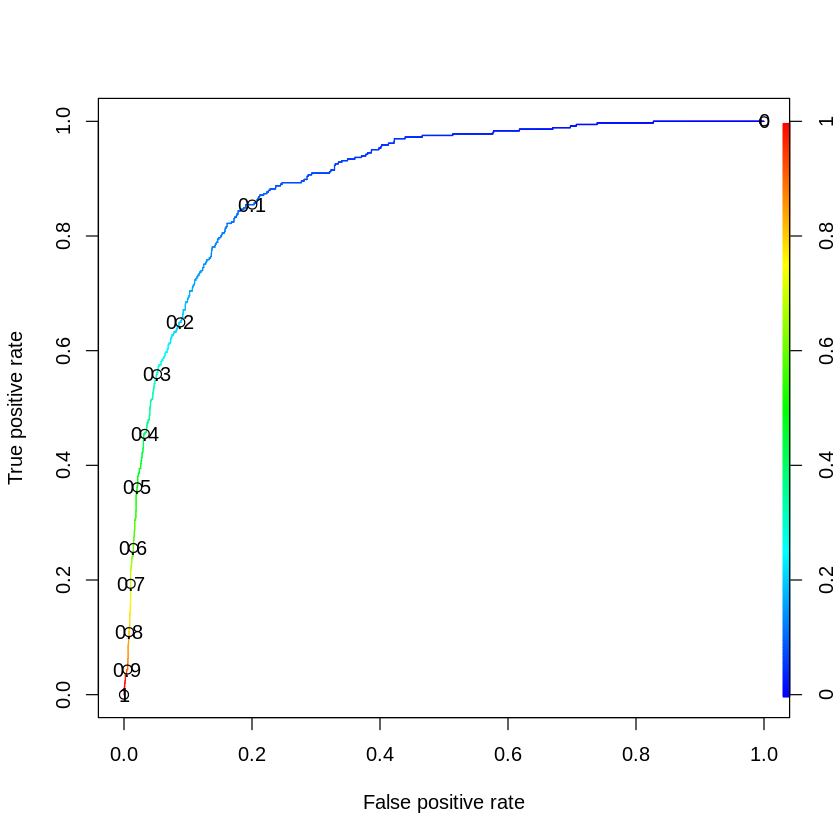

In [41]:
## Create a prediction object with probabilities on train
## Stores the predictions for multiple thresholds
pred_object <- prediction(prob_train, train_data$y)

## Compute TPR and FPR to get ROC curve
tpr_fpr <- performance(pred_object, measure="tpr", x.measure="fpr")

#Plot the ROC curve using the extracted performance measures (TPR and FPR)
plot(tpr_fpr, col=rainbow(10), colorize=T, print.cutoffs.at=seq(0,1,0.1))

In [42]:
# Compute Area under the curve (AUC) using the same pred_object
perf_auc <- performance(pred_object, measure="auc")
auc <- perf_auc@y.values
print(auc)

[[1]]
[1] 0.9020616



#### Confusion matrix with 0.1 as the threshold

In [43]:
# Predicting on train data
prob_train_vanilla <- predict(log_reg, train_data, type="response") 
## Setting 0.1 as threshold
preds_train_vanilla_0.1 <- as.factor(ifelse(prob_train_vanilla > 0.1,1, 0))


# Predicting on validation data with the same threshold
prob_val_vanilla <- predict(log_reg, validation_data, type="response") 
preds_validation_vanilla_0.1 <- as.factor(ifelse(prob_val_vanilla > 0.1,1, 0))

## Print Metrics
cat("Train Metrics")
eval_metrics(train_data$y,preds_train_vanilla_0.1)
cat("Validation Metrics")
eval_metrics(validation_data$y,preds_validation_vanilla_0.1)

Train Metrics
Confusion Matrix 
 
    1    0
1 312   53
0 560 2240

Accuracy  : 0.8063191 
TP_rate   : 0.8547945 
FP_rate   : 0.2 
TN_rate   : 0.8 
Precision : 0.3577982 

Validation Metrics
Confusion Matrix 
 
    1   0
1 124  32
0 221 979

Accuracy  : 0.8134218 
TP_rate   : 0.7948718 
FP_rate   : 0.1841667 
TN_rate   : 0.8158333 
Precision : 0.3594203 



### Use VIF to find multi-collinearity

In [44]:
## VIF
install.packages("car")
library(car)

log_reg_vif = vif(log_reg)
log_reg_vif

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’


Loading required package: carData



,GVIF,Df,GVIF^(1/(2*Df))
age,2.394187,1,1.547316
job,5.909555,11,1.084103
marital,1.450869,2,1.097506
education,2.514115,3,1.166087
default,1.027255,1,1.013536
balance,1.078213,1,1.038370
housing,1.448627,1,1.203589
loan,1.080972,1,1.039698
contact,2.025964,2,1.193048
month,4.025453,11,1.065348


In [45]:
## Convert to dataframe to extract column names less than the threshold  
log_reg_vif = data.frame(log_reg_vif)

(log_reg_vif$GVIF..1..2.Df..)^2

[1] 2.394187 1.175280 1.204520 1.359758 1.027255 1.078213 1.448627 1.080972
 [9] 1.423364 1.134967 1.151849 1.137959 3.750596 1.830299 1.765819

#### StepAIC

In [46]:
#Select the best model using stepAIC
library(MASS)
step_aic_model = stepAIC(log_reg)

Start:  AIC=1594.27
y ~ age + job + marital + education + default + balance + housing + 
    loan + contact + month + duration + campaign + pdays + previous + 
    poutcome

            Df Deviance    AIC
- balance    1   1510.3 1592.3
- age        1   1510.3 1592.3
- pdays      1   1510.4 1592.4
- default    1   1510.5 1592.5
- previous   1   1510.7 1592.7
- housing    1   1510.7 1592.7
- job       11   1531.1 1593.1
<none>           1510.3 1594.3
- education  3   1517.0 1595.0
- marital    2   1516.0 1596.0
- campaign   1   1516.6 1598.6
- loan       1   1524.6 1606.6
- contact    2   1543.2 1623.2
- month     11   1586.1 1648.1
- poutcome   3   1590.5 1668.5
- duration   1   1892.1 1974.1

Step:  AIC=1592.28
y ~ age + job + marital + education + default + housing + loan + 
    contact + month + duration + campaign + pdays + previous + 
    poutcome

            Df Deviance    AIC
- age        1   1510.4 1590.4
- pdays      1   1510.4 1590.4
- default    1   1510.6 1590.6
- previous 

In [47]:
## Get the best model in call
step_aic_model$call

glm(formula = y ~ job + marital + education + loan + contact + 
    month + duration + campaign + poutcome, family = binomial, 
    data = train_data)

In [48]:
## Use the formula in call to build the AIC based model

log_reg_aic =  glm(formula = y ~ job + marital + education + loan + contact + 
    month + duration + campaign + poutcome, family = binomial, 
    data = train_data)

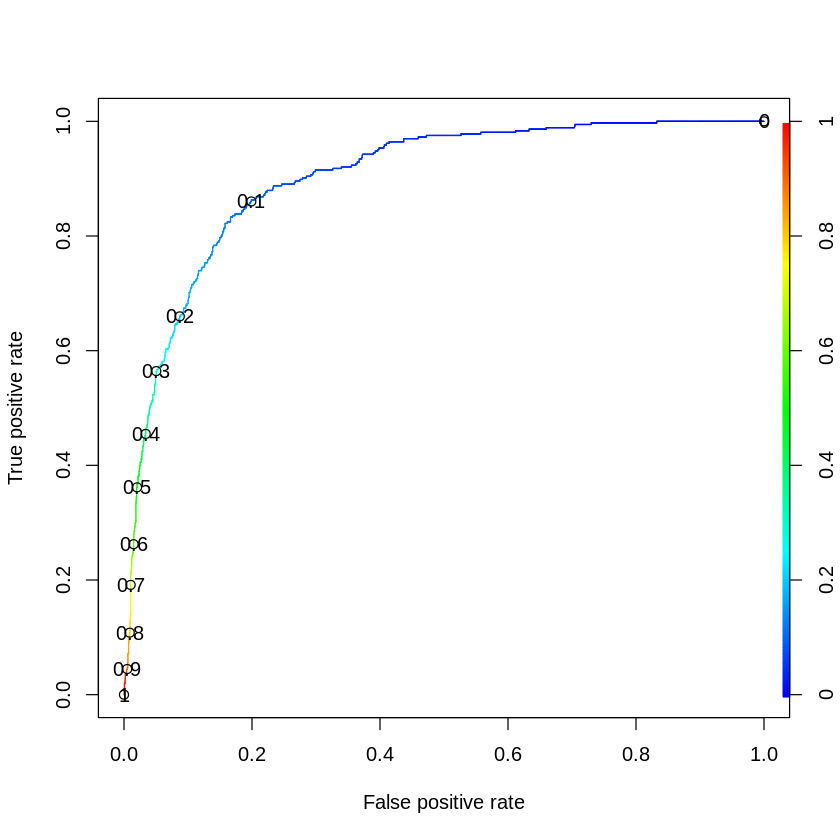

In [49]:
## Predict probabilities on train data
prob_train <- predict(log_reg_aic, train_data ,type="response")

## Compute TPR and FPR for various Thresholds
pred_object <- prediction(prob_train, train_data$y)
tpr_fpr <- performance(pred_object, measure="tpr", x.measure="fpr")

#Plot the ROC curve using the extracted performance measures (TPR and FPR)
plot(tpr_fpr, col=rainbow(10), colorize=T, print.cutoffs.at=seq(0,1,0.1))

In [50]:
# Predicting on train data
prob_train_aic <- predict(log_reg_aic, train_data ,type="response")
## Setting 0.1 as threshold
preds_train_aic_0.1 <- as.factor(ifelse(prob_train_aic > 0.1,1, 0))

# Predicting on validation data with the same threshold
prob_val_aic <- predict(log_reg_aic,validation_data , type="response")
preds_validation_aic_0.1 <- as.factor(ifelse(prob_val_aic > 0.1,1, 0))


cat("Train Metrics")
eval_metrics(train_data$y,preds_train_aic_0.1)
cat("Validation Metrics")
eval_metrics(validation_data$y,preds_validation_aic_0.1)

Train Metrics
Confusion Matrix 
 
    1    0
1 314   51
0 557 2243

Accuracy  : 0.8078989 
TP_rate   : 0.860274 
FP_rate   : 0.1989286 
TN_rate   : 0.8010714 
Precision : 0.3605052 

Validation Metrics
Confusion Matrix 
 
    1   0
1 123  33
0 223 977

Accuracy  : 0.8112094 
TP_rate   : 0.7884615 
FP_rate   : 0.1858333 
TN_rate   : 0.8141667 
Precision : 0.3554913 



#### Relevel the loan column and build model

In [51]:
## Original levels of the independent variable

levels(train_data$loan)

[1] "no"  "yes"

Here "no" is the reference level

In [52]:
## Relevel the reference level to "yes"
train_data$loan = relevel(train_data$loan,ref="yes")

In [53]:
## Check reference level after releveling

levels(train_data$loan)

[1] "yes" "no"

In [54]:
## Build a model with releveled data
log_reg_relevel <- glm(y~., data = train_data,family = binomial)

summary(log_reg_relevel)


Call:
glm(formula = y ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8993  -0.3906  -0.2508  -0.1395   3.0076  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -3.135e+00  7.379e-01  -4.248 2.16e-05 ***
age                -2.293e-03  8.573e-03  -0.267 0.789130    
jobblue-collar     -2.146e-01  2.997e-01  -0.716 0.473883    
jobentrepreneur    -1.047e-01  4.541e-01  -0.231 0.817588    
jobhousemaid       -3.338e-01  4.986e-01  -0.669 0.503191    
jobmanagement       1.348e-01  2.978e-01   0.453 0.650740    
jobretired          8.629e-01  3.786e-01   2.279 0.022650 *  
jobself-employed    4.799e-02  4.287e-01   0.112 0.910854    
jobservices         2.605e-01  3.274e-01   0.796 0.426220    
jobstudent          9.610e-01  4.512e-01   2.130 0.033187 *  
jobtechnician       3.310e-02  2.869e-01   0.115 0.908146    
jobunemployed      -6.618e-01  5.340e-01  -1.239 0.215209    

In [55]:
summary(log_reg)


Call:
glm(formula = y ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.8993  -0.3906  -0.2508  -0.1395   3.0076  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.225e+00  6.964e-01  -3.195 0.001399 ** 
age                -2.293e-03  8.573e-03  -0.267 0.789130    
jobblue-collar     -2.146e-01  2.997e-01  -0.716 0.473883    
jobentrepreneur    -1.047e-01  4.541e-01  -0.231 0.817588    
jobhousemaid       -3.338e-01  4.986e-01  -0.669 0.503191    
jobmanagement       1.348e-01  2.978e-01   0.453 0.650740    
jobretired          8.629e-01  3.786e-01   2.279 0.022650 *  
jobself-employed    4.799e-02  4.287e-01   0.112 0.910854    
jobservices         2.605e-01  3.274e-01   0.796 0.426220    
jobstudent          9.610e-01  4.512e-01   2.130 0.033187 *  
jobtechnician       3.310e-02  2.869e-01   0.115 0.908146    
jobunemployed      -6.618e-01  5.340e-01  -1.239 0.215209    

###### All the values are the same other than loan and intercept

In [56]:
## Relevel in the same way on validation data

levels(validation_data$loan)

validation_data$loan = relevel(validation_data$loan,ref="yes")

levels(validation_data$loan)

[1] "no"  "yes"

[1] "yes" "no"

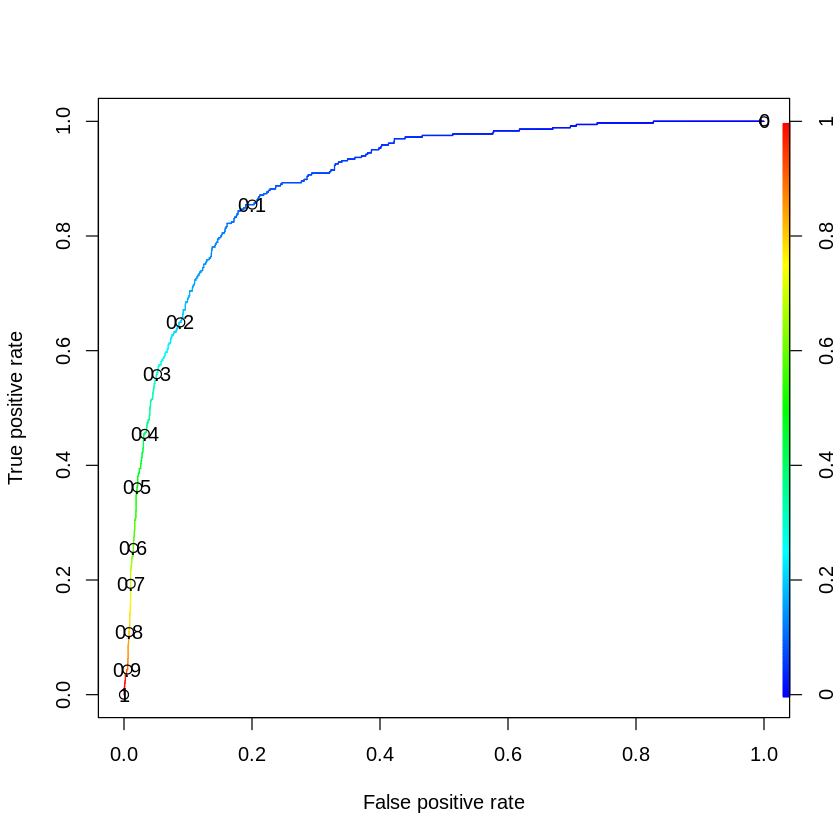

In [57]:
## Predict probabilities on train
prob_train <- predict(log_reg_relevel, train_data ,type="response")

## Compute TPR and FPR on various thresholds
pred_object <- prediction(prob_train, train_data$y)
tpr_fpr <- performance(pred_object, measure="tpr", x.measure="fpr")

#Plot the ROC curve using the extracted performance measures (TPR and FPR)
plot(tpr_fpr, col=rainbow(10), colorize=T, print.cutoffs.at=seq(0,1,0.1))

In [58]:
# Predicting on train data
prob_train <- predict(log_reg_relevel, type="response")
## Setting 0.1 as threshold
preds_train_relev_0.1 <- as.factor(ifelse(prob_train > 0.1,1, 0))

# Predicting on validation data with the same threshold
prob_val <- predict(log_reg_relevel, validation_data, type="response") # Predicting on validation data
preds_val_relev_0.1 <- as.factor(ifelse(prob_val > 0.1,1, 0))


cat("Train Metrics")
eval_metrics(train_data$y,preds_train_relev_0.1)
cat("Validation Metrics")
eval_metrics(validation_data$y,preds_val_relev_0.1)


Train Metrics
Confusion Matrix 
 
    1    0
1 312   53
0 560 2240

Accuracy  : 0.8063191 
TP_rate   : 0.8547945 
FP_rate   : 0.2 
TN_rate   : 0.8 
Precision : 0.3577982 

Validation Metrics
Confusion Matrix 
 
    1   0
1 124  32
0 221 979

Accuracy  : 0.8134218 
TP_rate   : 0.7948718 
FP_rate   : 0.1841667 
TN_rate   : 0.8158333 
Precision : 0.3594203 



In [59]:
## Metrics on original vanilla model

cat("Train Metrics")
eval_metrics(train_data$y,preds_train_vanilla_0.1)
cat("Validation Metrics")
eval_metrics(validation_data$y,preds_validation_vanilla_0.1)


Train Metrics
Confusion Matrix 
 
    1    0
1 312   53
0 560 2240

Accuracy  : 0.8063191 
TP_rate   : 0.8547945 
FP_rate   : 0.2 
TN_rate   : 0.8 
Precision : 0.3577982 

Validation Metrics
Confusion Matrix 
 
    1   0
1 124  32
0 221 979

Accuracy  : 0.8134218 
TP_rate   : 0.7948718 
FP_rate   : 0.1841667 
TN_rate   : 0.8158333 
Precision : 0.3594203 



### The metrics would be the same after re-leveling